In [1]:
import numpy as np
import random
import time


In [38]:
class Cell:
    def __init__(self, h=0, d=0, b=0, g=0):
        self.h, self.d, self.b, self.g = h, d, b, g
        self.visited = False
        self.mazeMatrix = None  # Référence à la matrice du labyrinthe
        self.position = None  # Position de la cellule dans la matrice
        self.neighbors = []
    def set_maze_matrix(self, mazeMatrix, position):
        """
        Définit la matrice du labyrinthe et la position de la cellule dans cette matrice.

        :param mazeMatrix: Matrice du labyrinthe
        :param position: Tuple (i, j) représentant la position de la cellule
        """
        self.mazeMatrix = mazeMatrix
        self.position = position
        self.neighbors = self.get_neighbors()

    def get_neighbors(self):
        """
        Retourne la liste des voisins valides de la cellule.

        :return: Liste des voisins valides
        """
        if type(self.mazeMatrix) != np.ndarray  or self.position == None:
            return []

        i, j = self.position
        neighbors = []

        # Voisin du haut
        if i > 0 and not self.h:
            neighbors.append(self.mazeMatrix[i - 1, j])

        # Voisin du bas
        if i < self.mazeMatrix.shape[0] - 1 and not self.b:
            neighbors.append(self.mazeMatrix[i + 1, j])

        # Voisin de gauche
        if j > 0 and not self.g:
            neighbors.append(self.mazeMatrix[i, j - 1])

        # Voisin de droite
        if j < self.mazeMatrix.shape[1] - 1 and not self.d:
            neighbors.append(self.mazeMatrix[i, j + 1])

        return neighbors

    def __repr__(self):
        return f"Cell(h={self.h}, b={self.b}, g={self.g}, d={self.d})"


In [39]:
class PseudoMaze:
    def __init__(self, size):
        self.size = size
        self.height, self.width = self.size
        self.generate()
        self.init_cells()

    def generate(self):
        L = np.empty((self.height, self.width), dtype=object)
        for i in range(self.height):
            for j in range(self.width):
                L[i, j] = Cell()
        for i in range(self.height):
            for j in range(self.width):
                cell = L[i, j]
                if i == 0:
                    cell.h = 1
                if i == self.height - 1:
                    cell.b = 1
                if j == 0:
                    cell.g = 1
                if j == self.width - 1:
                    cell.d = 1
                cell.set_maze_matrix(L, (i, j))  # Définir la matrice et la position
        self.mazeMatrix = L
        
    def init_cells(self):
        for i in range(self.width):
            for j in range(self.height):
                self.mazeMatrix[i,j].set_maze_matrix(self.mazeMatrix, (i,j))
                self.mazeMatrix[i,j].neigbors = self.mazeMatrix[i,j].get_neighbors()
                
    def to_graph(self):
        g = Graph()
        for i in range(self.height):
            for j in range(self.width):
                cell = self.mazeMatrix[i, j]
                if not cell.h:
                    g.add_edge((i, j), (i - 1, j))
                if not cell.b:
                    g.add_edge((i, j), (i + 1, j))
                if not cell.g:
                    g.add_edge((i, j), (i, j - 1))
                if not cell.d:
                    g.add_edge((i, j), (i, j + 1))
        return g

    def plot_maze(self):
        p = plot([])
        for i in range(self.height):
            for j in range(self.width):
                y = self.height - i
                c = self.mazeMatrix[i, j]
                p += line2d([(j, y), (j, y - 1)], thickness=1 + 4 * c.g, color="black")
                p += line2d([(j, y), (j + 1, y)], thickness=1 + 4 * c.h, color="black")
                p += line2d([(j, y - 1), (j + 1, y - 1)], thickness=1 + 4 * c.b, color="black")
                p += line2d([(j + 1, y), (j + 1, y - 1)], thickness=1 + 4 * c.d, color="black")
        p.show()


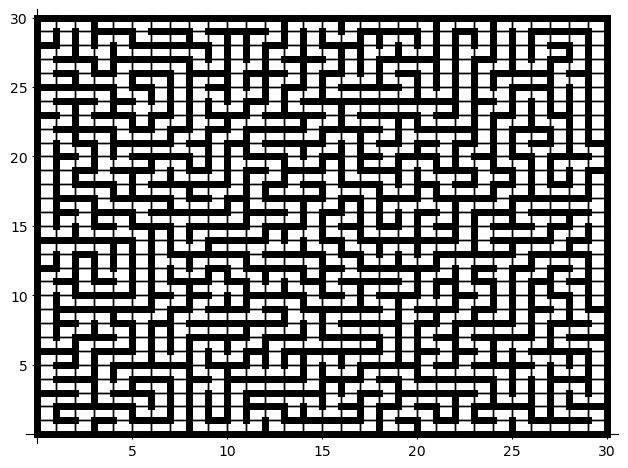

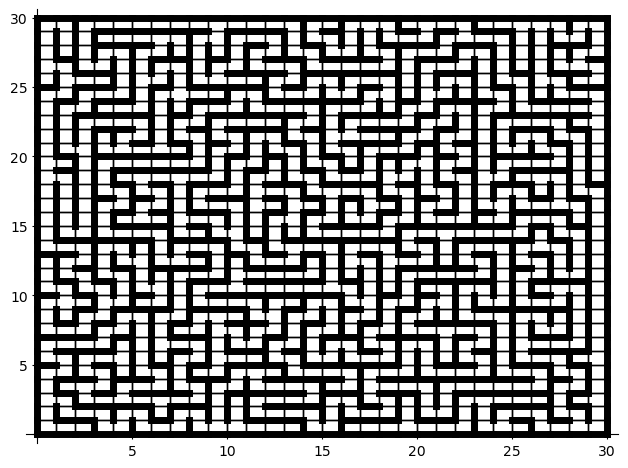

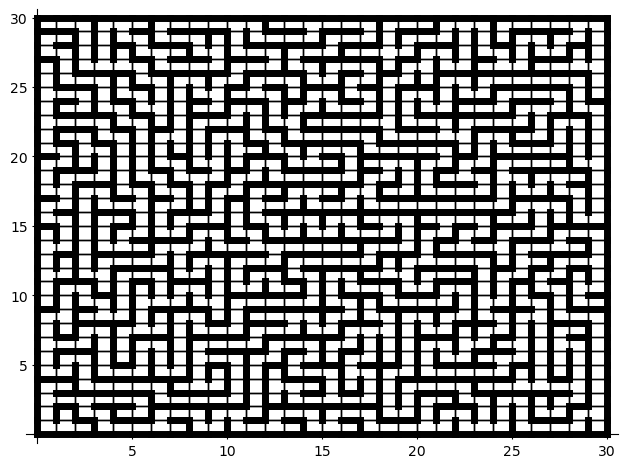

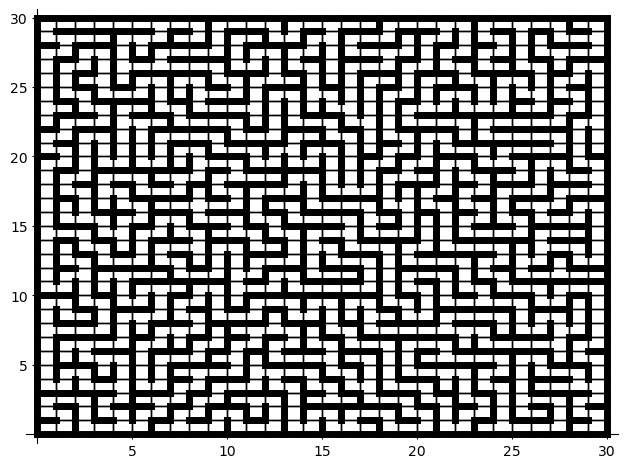

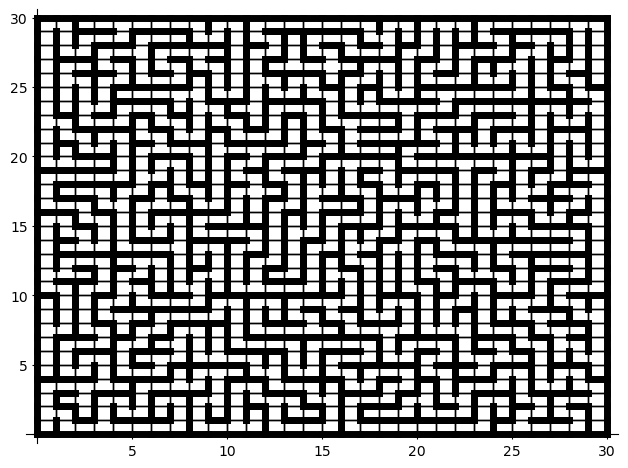

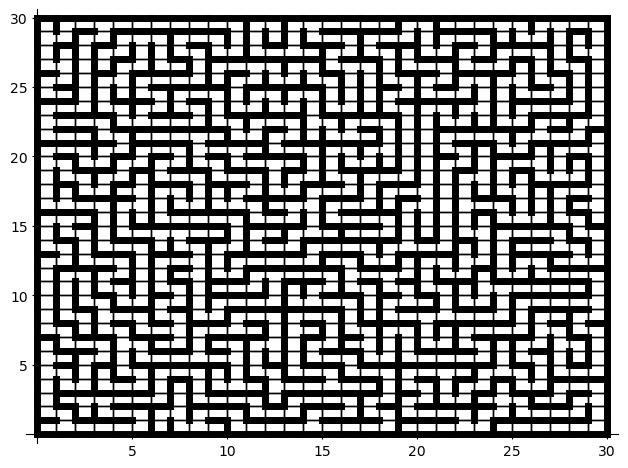

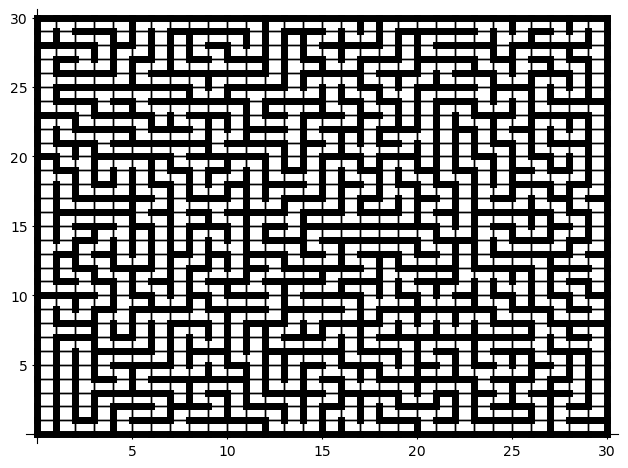

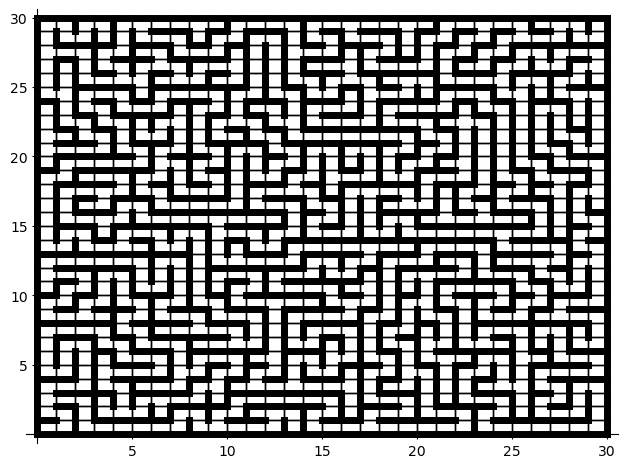

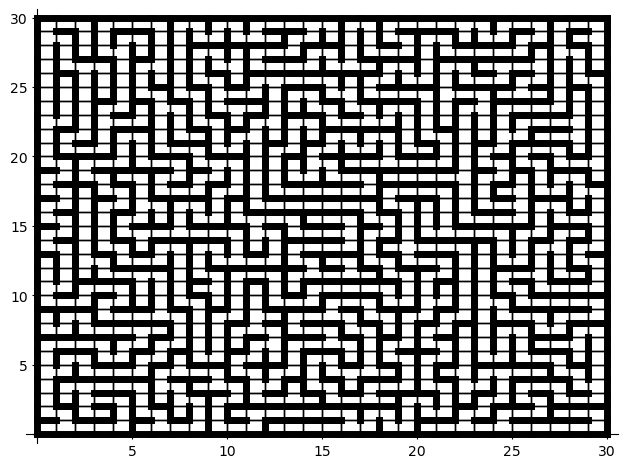

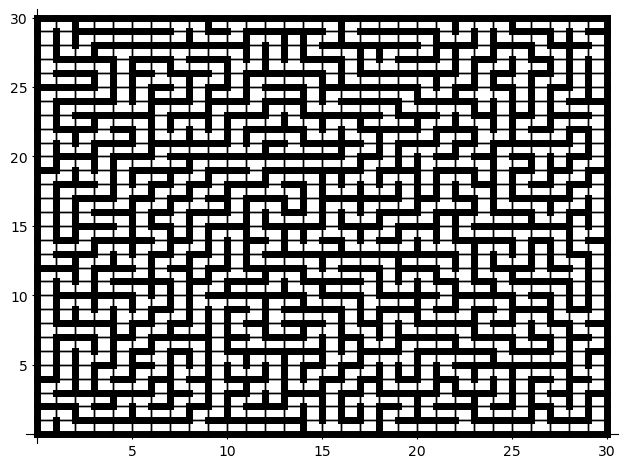

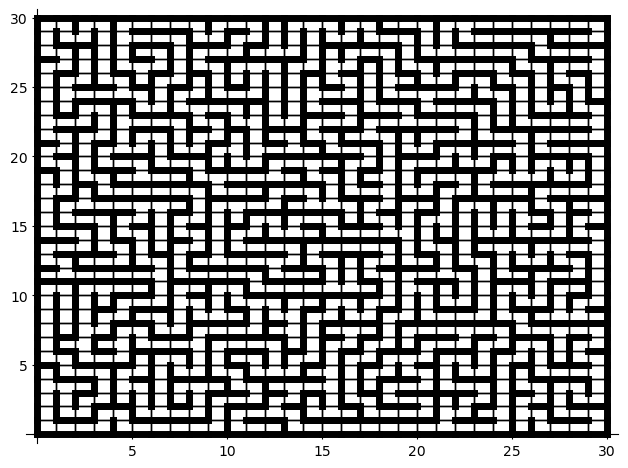

In [ ]:
def generation_aleatoire(width, height):
    # Initialize the maze
    L = PseudoMaze((height, width))
    L.generate()
    for x in range(width):
        for y in range(height):
            L.mazeMatrix[x,y].h, L.mazeMatrix[x,y].b, L.mazeMatrix[x,y].d, L.mazeMatrix[x,y].g = 1,1,1,1 
    # Start from the top-left cell
    currentCell = L.mazeMatrix[random.choice(range(height)), random.choice(range(width))]
    currentCell.visited = True
    stack = [currentCell]

    # While there are unvisited cells
    while stack:
        currentCell = stack[-1]
        non_visited_neighbors = [
            neighbor for neighbor in currentCell.neighbors if not neighbor.visited
        ]

        if non_visited_neighbors:
            # Choose a random non-visited neighbor
            nextCell = random.choice(non_visited_neighbors)
            nextCell.visited = True

            # Remove the wall between currentCell and nextCell
            if currentCell.position[0] == nextCell.position[0]:
                # Same row, remove vertical wall
                if currentCell.position[1] < nextCell.position[1]:
                    currentCell.d = 0
                    nextCell.g = 0
                else:
                    currentCell.g = 0
                    nextCell.d = 0
            else:
                # Same column, remove horizontal wall
                if currentCell.position[0] < nextCell.position[0]:
                    currentCell.b = 0
                    nextCell.h = 0
                else:
                    currentCell.h = 0
                    nextCell.b = 0

            stack.append(nextCell)
        else:
            stack.pop()

    return L

for i in range(20):
    maze = generation_aleatoire(30, 30)
    maze.plot_maze()